Impulse Noise :

In [1]:
# libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 

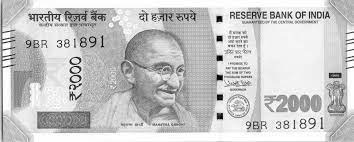

In [2]:
# orginal image
img = cv2.imread('currency.jpg',0)
cv2_imshow(img) 

In [3]:
import random
import cv2

 
def add_noise(img):
 
    # Getting the dimensions of the image
    row  = img.shape[0]
    col = img.shape[1]
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
 
# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('currency.jpg',
                 cv2.IMREAD_GRAYSCALE)
 
#Storing the image
cv2.imwrite('impulse.jpg',
            add_noise(img))

True

Frequency Domain Filters :

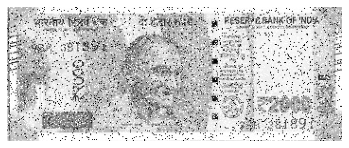

In [4]:

# original image
f = cv2.imread('impulse.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

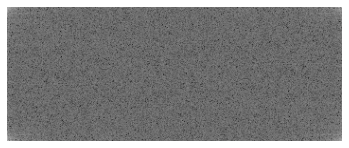

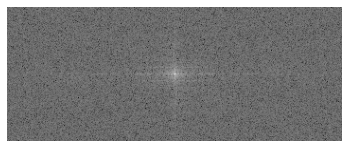

In [5]:
# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)), 
           cmap='gray')
plt.axis('off')
plt.show()

Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)), 
           cmap='gray')
plt.axis('off')
plt.show()


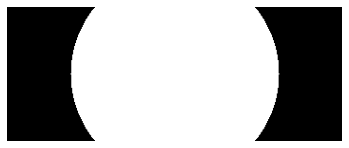

In [6]:
# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 110
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

ILPF :

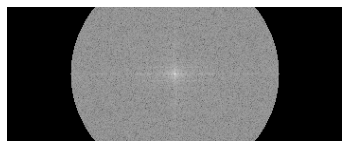

In [7]:

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

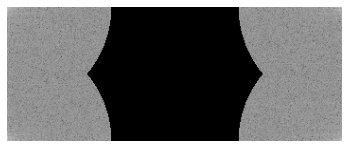

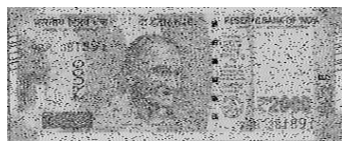

In [8]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

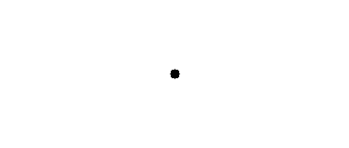

In [9]:
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 5
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 0
        else:
            H[u,v] = 1
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()



IHPF :

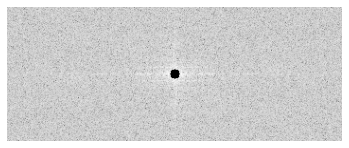

In [10]:

# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

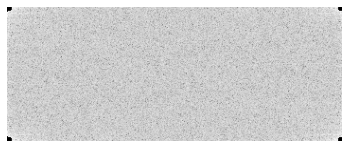

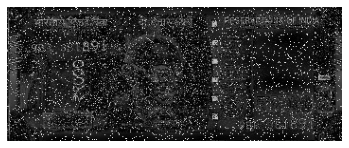

In [11]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()


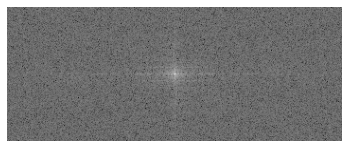

In [12]:
# open the image
f = cv2.imread('impulse.jpg',0)

# transform image into freq. domain and shifted
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()


BLPF :

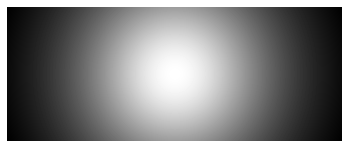

In [13]:
# Butterwort Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 110 # cut of frequency
n = 2 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()


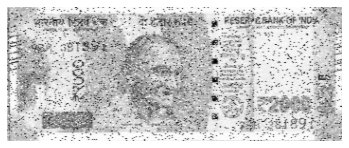

In [14]:
# frequency domain image filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

BHPF :

<ipython-input-15-23041dc2269e>:8: RuntimeWarning: divide by zero encountered in double_scalars
  HPF[u,v] = 1 / (1 + (D0/D)**n)


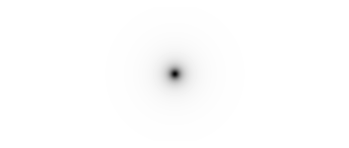

In [15]:
# Butterworth High Pass Filter
HPF = np.zeros((M,N), dtype=np.float32)
D0 = 5
n = 2
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        HPF[u,v] = 1 / (1 + (D0/D)**n)
        
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

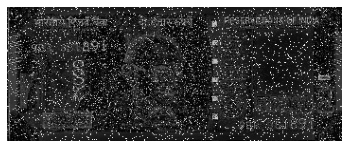

In [16]:
# frequency domain image filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

GLPF:

<Figure size 360x360 with 0 Axes>

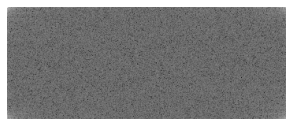

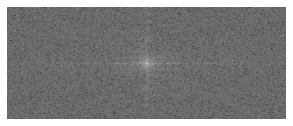

In [17]:
# open the image f
f = cv2.imread('impulse.jpg',0)

plt.figure(figsize=(5,5))

# transform the image into frequency domain, f --> F
F = np.fft.fft2(f)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray')
plt.axis('off')
plt.show()

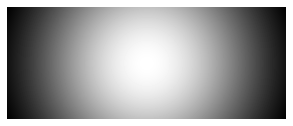

In [18]:

# Create Gaussin Filter: Low Pass Filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 110
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.figure(figsize=(5,5))
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

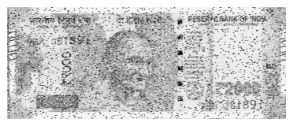

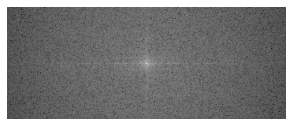

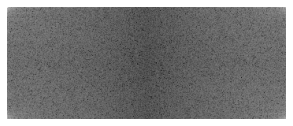

In [19]:

# Image Filters
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

GHPF :

In [20]:
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 5
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))


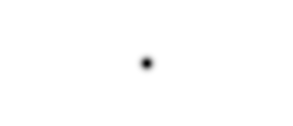

In [21]:

# Gaussian: High pass filter
HPF = 1 - H

plt.figure(figsize=(5,5))
plt.imshow(HPF, cmap='gray')
plt.axis('off')
plt.show()

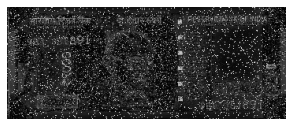

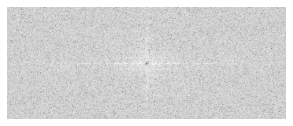

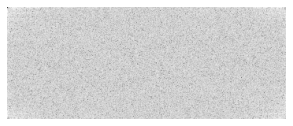

In [22]:
# Image Filters
Gshift = Fshift * HPF
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

plt.figure(figsize=(5,5))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis('off')
plt.show()

Laplacian Filter (Frequency) :

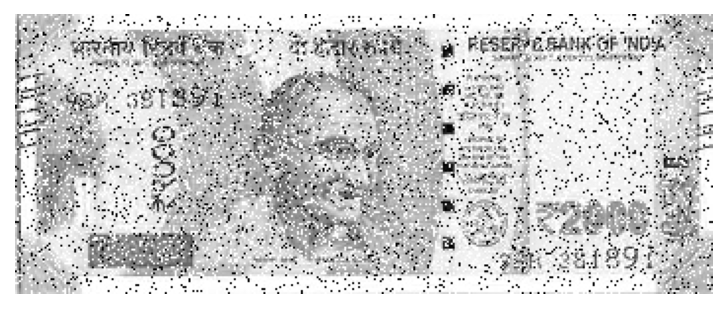

In [23]:
# open and normalized the image
f = cv2.imread('impulse.jpg',0)
f = f / 255

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()


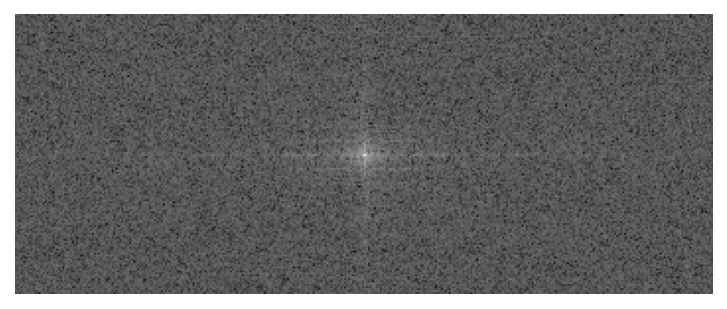

In [24]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

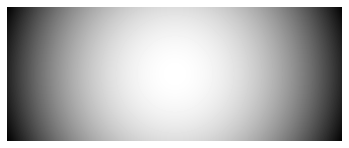

In [25]:
# Laplacian Filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)
        
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

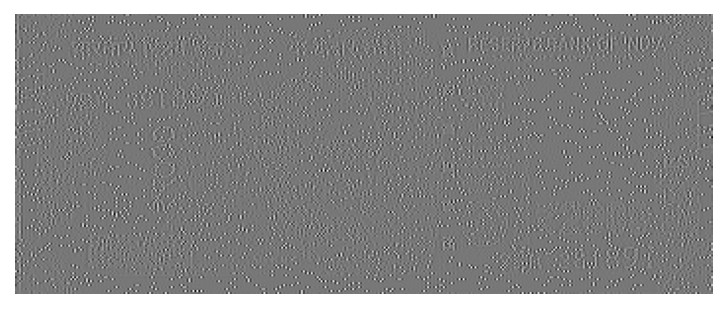

In [26]:
# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

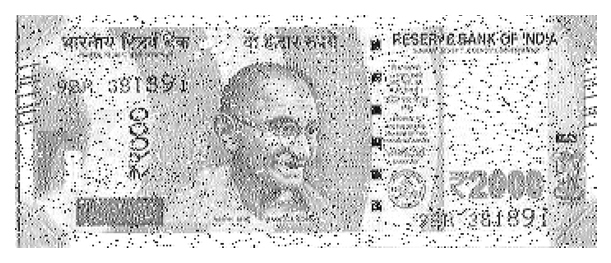

In [27]:
# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

 Unsharp Masking and Highboost Filtering in Frequency Domain :

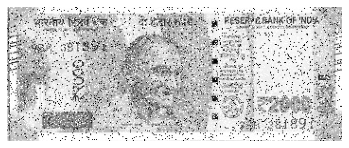

In [28]:
f = cv2.imread('impulse.jpg',0)

plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

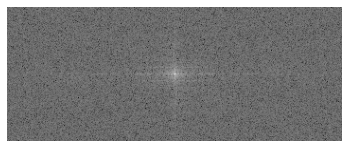

In [29]:
# input image in frequency domain, F(u,v)
F = np.fft.fftshift(np.fft.fft2(f))

plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()


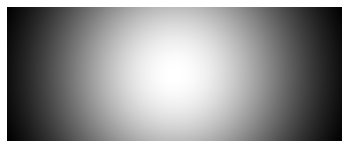

In [30]:
# Gaussian Low Pass Filter
M,N = F.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 100
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = np.exp(-D**2/(2*D0*D0))

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

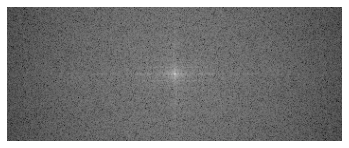

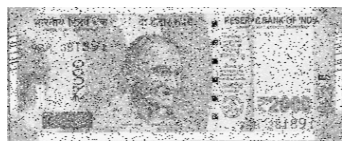

In [31]:
# create fLP(x,y) (smoothed image)
FLP = H * F
plt.imshow(np.log1p(np.abs(FLP)), cmap='gray')
plt.axis('off')
plt.show()
FLP = np.fft.ifftshift(FLP)
fLP = np.abs(np.fft.ifft2(FLP))

plt.imshow(fLP, cmap='gray')
plt.axis('off')
plt.show()

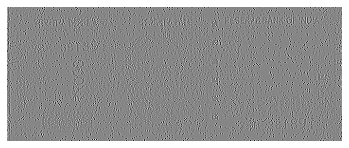

In [32]:
# create mask g(x,y)
gMask = f - fLP

plt.imshow(gMask, cmap='gray')
plt.axis('off')
plt.show()

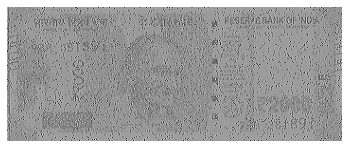

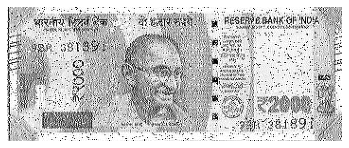

In [33]:
# unsharp masking
k = 5
g = f + k*gMask

plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

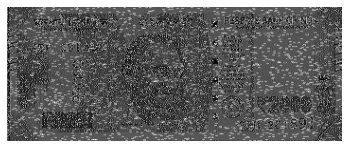

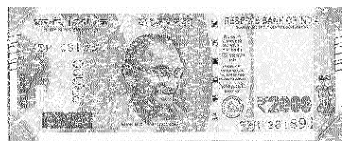

In [34]:
# Unsharp Masking in Frequency Domain
G = (1 + k*(1-H))*F
g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

g = np.clip(g, 0, 255)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

Spatial Domain Filters :

Mean Filter :

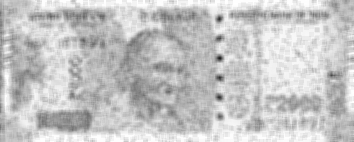

In [35]:
s = cv2.imread('impulse.jpg',0)
## denoise image
# mean filter (average)
m = 5
n = 5
denoise_mean = cv2.blur(s, (m,n))
cv2_imshow(denoise_mean)



Guassian Filter (Weighted Average):

Median Filter :

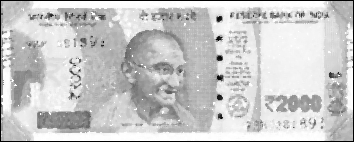

In [43]:
# Read the image
img_noisy1 = cv2.imread('impulse.jpg', 0)

# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape

# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = [img_noisy1[i-1, j-1],
			img_noisy1[i-1, j],
			img_noisy1[i-1, j + 1],
			img_noisy1[i, j-1],
			img_noisy1[i, j],
			img_noisy1[i, j + 1],
			img_noisy1[i + 1, j-1],
			img_noisy1[i + 1, j],
			img_noisy1[i + 1, j + 1]]
		
		temp = sorted(temp)
		img_new1[i, j]= temp[4]

median = img_new1.astype(np.uint8)
cv2.imwrite('new_median_filtered.png', img_new1)
cv2_imshow(img_new1)

Laplacian Filter (Spatial Domain) :

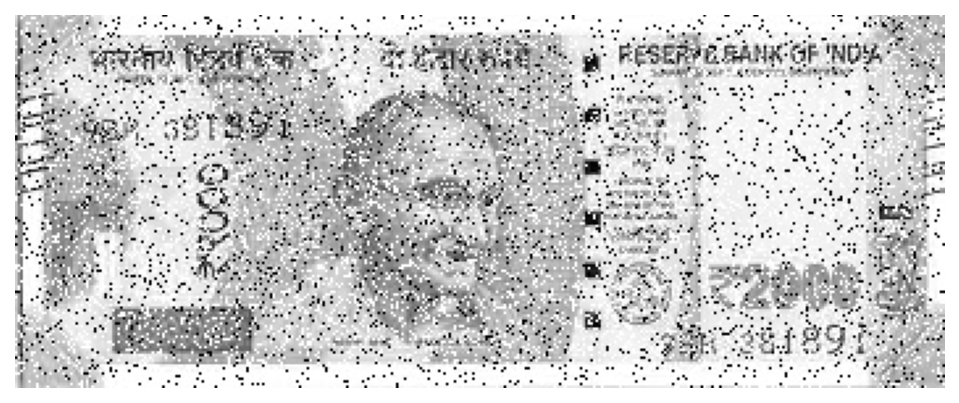

In [47]:
img = cv2.imread('impulse.jpg', 0)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

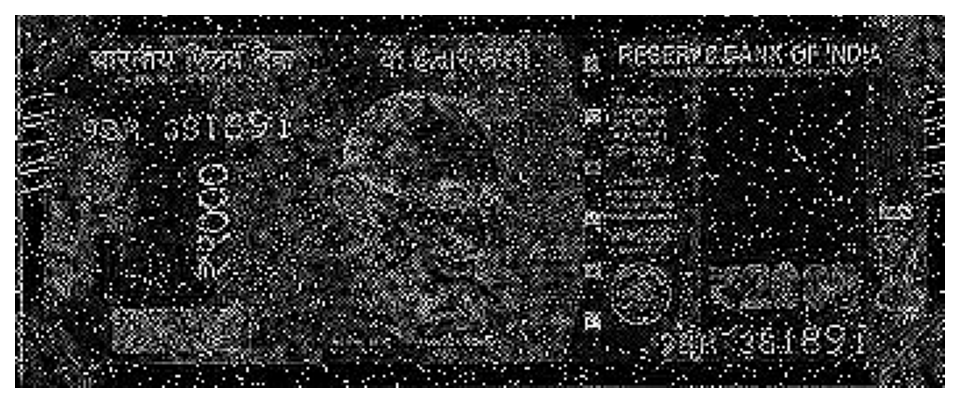

In [48]:
# kernel 1
kernel = np.array([[0, 1, 0],
                   [1, -4, 1],
                   [0, 1, 0]])

LaplacianImage = cv2.filter2D(src=img, 
                              ddepth=-1, 
                              kernel=kernel)

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(LaplacianImage, cmap='gray')
plt.axis('off')
plt.show()

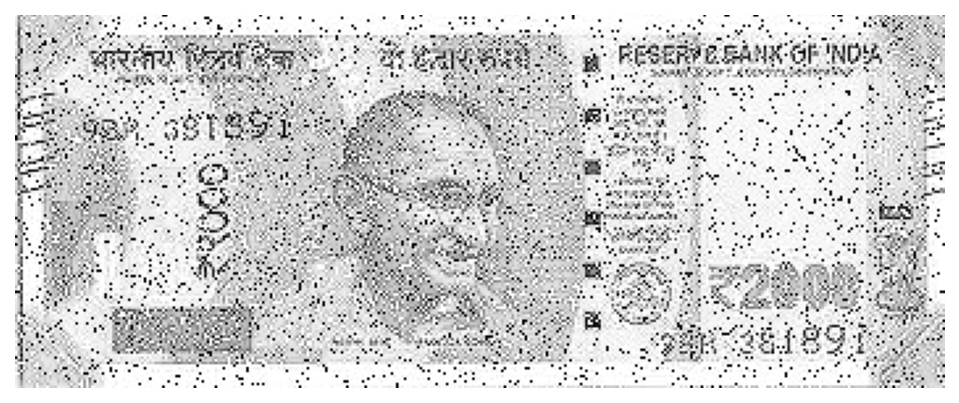

In [49]:
c = -1
g = img + c*LaplacianImage

plt.figure(figsize=(8,5), dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

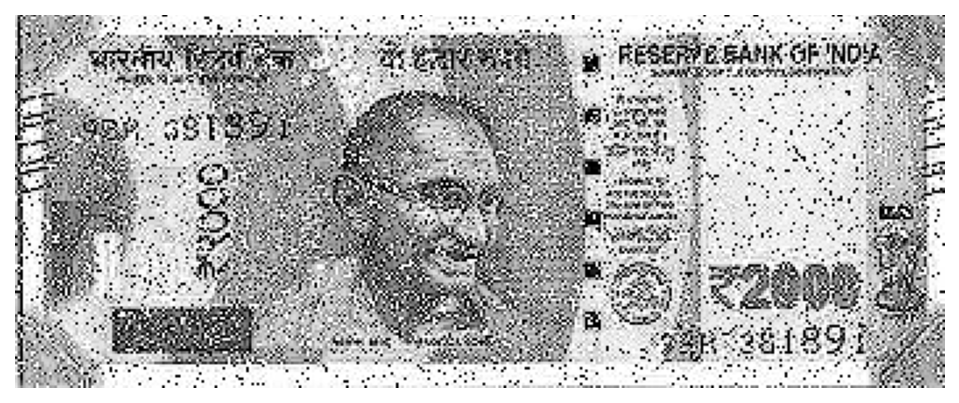

In [50]:
gClip = np.clip(g, 0, 255)
plt.figure(figsize=(8,5), dpi=150)
plt.imshow(gClip, cmap='gray')
plt.axis('off')
plt.show()

Unsharp Masking and High-boost in spatial domain :

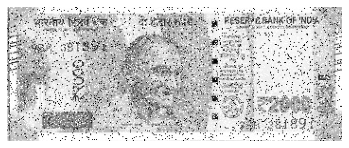

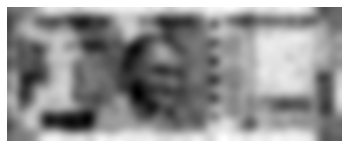

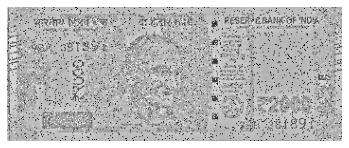

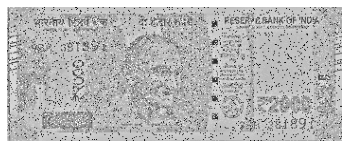

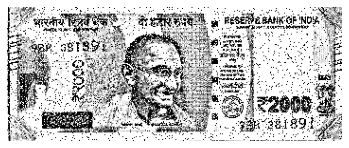

In [51]:
# input image f(x,y)
f = cv2.imread('impulse.jpg', 0)
f = f / 255

plt.imshow(f, cmap='gray'); plt.axis('off'); plt.show()

# blur image
f_blur = cv2.GaussianBlur(src=f, 
                          ksize=(31,31), 
                          sigmaX=0, 
                          sigmaY=0)

plt.imshow(f_blur, cmap='gray'); plt.axis('off'); plt.show()

# mask
g_mask = f - f_blur
plt.imshow(g_mask, cmap='gray'); plt.axis('off'); plt.show()

# unsharp masking
k = 5
g = f + k*g_mask
plt.imshow(g, cmap='gray'); plt.axis('off'); plt.show()

g = np.clip(g, 0, 1)
plt.imshow(g, cmap='gray'); plt.axis('off'); plt.show()

Geometric Mean Filter :

In [39]:
import cv2
import numpy as np

img = cv2.imread('impulse.jpg', cv2.IMREAD_GRAYSCALE).astype(float)
rows, cols = img.shape[:2]
ksize = 3


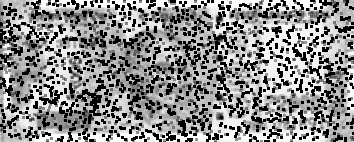

In [40]:
padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(img, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean1 = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        geomean1[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))
geomean1 = np.uint8(geomean1)
cv2_imshow(geomean1)


Contra Harmonic Mean Filter :

 For positive values of Q, the filter eliminates pepper noise.

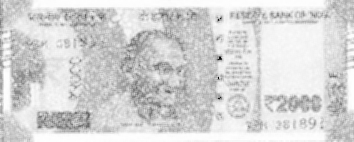

In [52]:
import numpy as np
import cv2
#read noise image
img_src = cv2.imread('impulse.jpg')

def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

cv2_imshow(contraharmonic_mean(img_src, (3,3), 0.9))

For negative values of Q it eliminates salt noise. It cannot do both simultaneously.

<ipython-input-52-d7cc35931ed6>:8: RuntimeWarning: divide by zero encountered in power
  denom = np.power(img, Q)


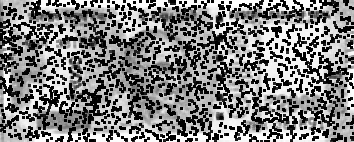

In [53]:
cv2_imshow(contraharmonic_mean(img_src, (3,3), -0.9))

Conservative Smoothing Filter:

In [41]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

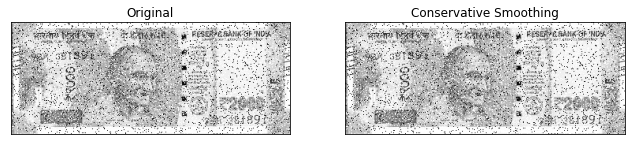

In [42]:
new_image = conservative_smoothing_gray(s,9)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(s, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

Best Outcome : Median Filter

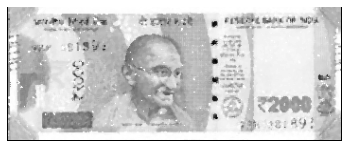

In [54]:
f = cv2.imread('new_median_filtered.png', 0)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()

Unsharp filter Enhance Edges

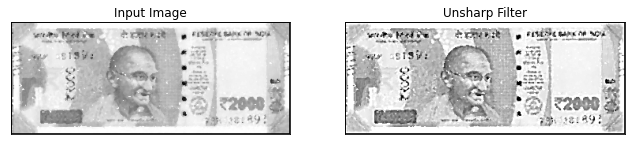

In [55]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
img = cv2.imread('new_median_filtered.png', 0)
img = Image.fromarray(img.astype('uint8'))
new_image = img.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()